In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import datetime as dt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

# Let's open the files and get an initial understanding of what data is available

In [2]:
## Let's work through the stations
origStations = pd.read_csv('data\example_sprit_cut_station.csv', sep=';')

In [3]:
#Get a quick understanding of what data is available
origStations.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [4]:
origStations.shape

(824, 12)

In [5]:
origStations.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [6]:
#Some entries are missing, futher exploration is required
#824 unique IDs, 824 different stations (or is it?)
origStations.info()
dfStations = origStations.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [7]:
#There are duplicate entries for each of the stations, lets clean this up

dfStations['ID'].value_counts()

e6da7859-c6d2-4087-9167-e623721f1f00    2
95b4d2c6-2b08-480a-aa8d-9ecfe3503e1f    2
8607b08c-fdc8-4e54-8c0e-3403b333437d    2
e0322125-5d6e-4b80-a32f-44de3ddecd34    2
a674473d-bdc4-4e05-9677-e4dd74ed0184    2
96886886-b257-415d-78f8-8bed207a6871    2
8a0bc647-d690-4e43-9e80-479e422af7df    2
a00a98c1-6216-4ead-86ee-ae5df2035e1b    2
a315bb6f-e512-4afc-843e-65c7e1abcb29    2
cdff494c-2f11-4001-9241-e7cf61c3ebb8    2
567d1f76-3643-4022-a12e-c54c896b125e    2
d2a7a921-f817-4b88-8987-0b757ab09e38    2
fdca8d3a-c7e7-4fe1-ad17-27772aab7d62    2
4168cc8c-3c08-4ab6-aab4-6cc8c4e3c380    2
e5719fb8-559a-402c-95b6-25a5f74eb24b    2
952200d2-309b-45fc-ba4f-c13cef72077e    2
4d9c944e-9e75-4bb9-8041-0ae354774d9f    2
53bd78c2-d1ce-49e4-a4a9-25b90d920b7f    2
cf4bd9a3-86cf-4714-b400-03fe104885c9    2
400ce1d0-e095-47dd-a0fc-6073edd7c8d2    2
51d4b675-a095-1aa0-e100-80009459e03a    2
00b33b42-8357-40c2-baf5-c7c49b40b2af    2
ed2cd661-be8d-4fcb-b012-82d6672efd2d    2
602a47f1-7182-46b6-bcf5-25c7a1d475

In [8]:
#All of our IDs are unique now and we've created a new table
dfStations = dfStations.drop_duplicates(subset='ID', keep="last")

In [9]:
#This looks better
dfStations['ID'].value_counts()

e6da7859-c6d2-4087-9167-e623721f1f00    1
95b4d2c6-2b08-480a-aa8d-9ecfe3503e1f    1
8607b08c-fdc8-4e54-8c0e-3403b333437d    1
e0322125-5d6e-4b80-a32f-44de3ddecd34    1
a674473d-bdc4-4e05-9677-e4dd74ed0184    1
96886886-b257-415d-78f8-8bed207a6871    1
8a0bc647-d690-4e43-9e80-479e422af7df    1
a00a98c1-6216-4ead-86ee-ae5df2035e1b    1
a315bb6f-e512-4afc-843e-65c7e1abcb29    1
cdff494c-2f11-4001-9241-e7cf61c3ebb8    1
567d1f76-3643-4022-a12e-c54c896b125e    1
d2a7a921-f817-4b88-8987-0b757ab09e38    1
fdca8d3a-c7e7-4fe1-ad17-27772aab7d62    1
4168cc8c-3c08-4ab6-aab4-6cc8c4e3c380    1
e5719fb8-559a-402c-95b6-25a5f74eb24b    1
952200d2-309b-45fc-ba4f-c13cef72077e    1
4d9c944e-9e75-4bb9-8041-0ae354774d9f    1
53bd78c2-d1ce-49e4-a4a9-25b90d920b7f    1
cf4bd9a3-86cf-4714-b400-03fe104885c9    1
400ce1d0-e095-47dd-a0fc-6073edd7c8d2    1
51d4b675-a095-1aa0-e100-80009459e03a    1
00b33b42-8357-40c2-baf5-c7c49b40b2af    1
ed2cd661-be8d-4fcb-b012-82d6672efd2d    1
602a47f1-7182-46b6-bcf5-25c7a1d475

In [10]:
#Combine lat long and see if there's any duplicates

dfStations["LATLNG"] = dfStations["LAT"].map(str) + ", " +  dfStations["LNG"].map(str)

In [11]:
#Clean up!

dfStations['LATLNG'].value_counts()

49.1953, 7.59698                         2
49.3556999, 8.260949900000002            2
49.564999900000004, 8.059295             1
49.515189899999996, 8.406239999999999    1
49.603099900000004, 8.46808              1
48.9746, 8.31436                         1
49.191827, 8.111852                      1
49.1443, 8.02003                         1
48.862099900000004, 8.235389999999999    1
49.526049900000004, 8.3549319            1
49.4802999, 7.734186                     1
49.1943778, 8.1875269                    1
49.193427899999996, 8.1244929            1
49.2805, 7.638910000000001               1
49.2706, 8.33549                         1
49.3323299, 8.43046                      1
49.2842112, 8.1407368                    1
49.5122429, 8.358452999999999            1
49.2267999, 8.3743999                    1
49.482837599999996, 7.730861999999999    1
49.1370239, 8.4264709                    1
49.0140999, 8.35528                      1
49.4536749, 7.7916829                    1
49.4694, 8.

In [12]:
dfStations = dfStations.drop_duplicates(subset='LATLNG', keep="last")

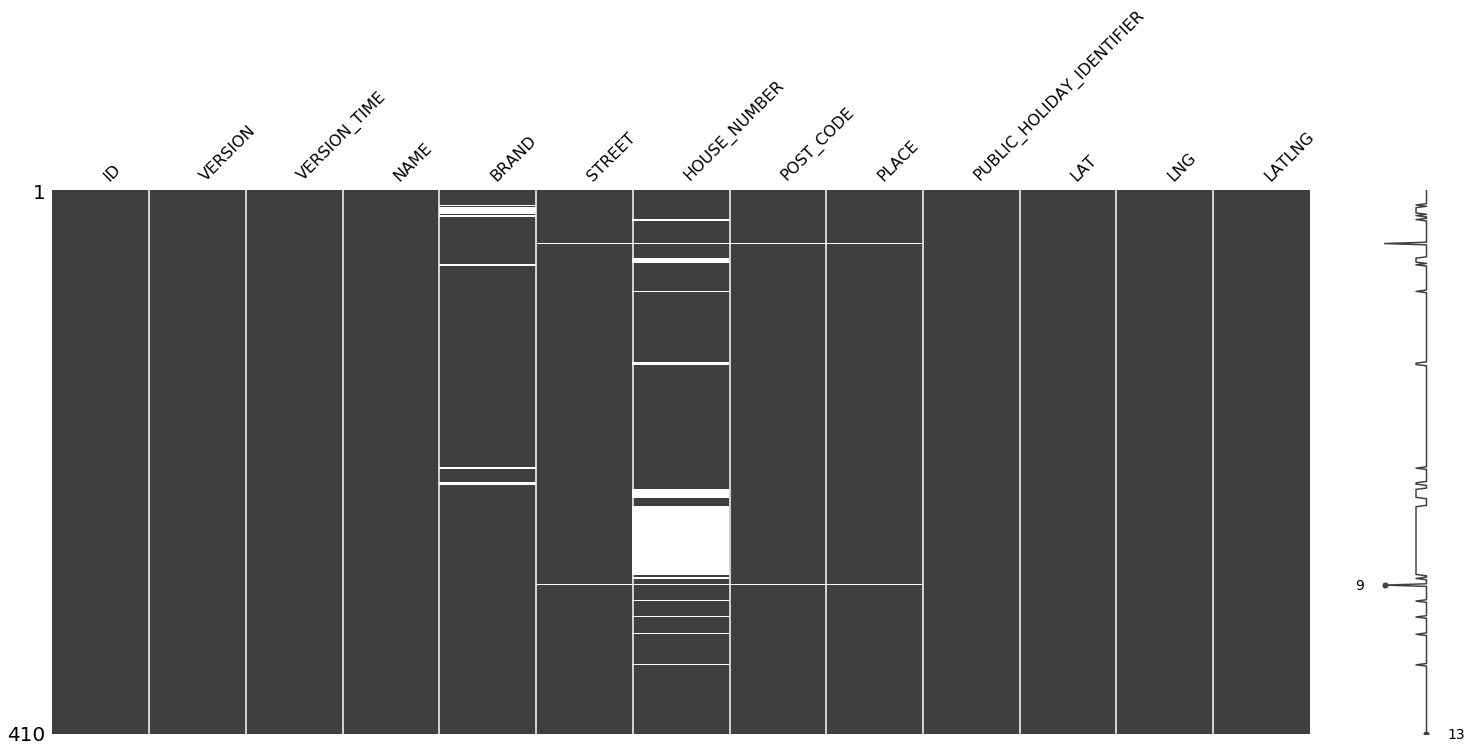

In [13]:
#We're missing some information about the stations

ms.matrix(dfStations)

In [14]:
#Rename ID to STID so that both tables are the same
dfStations.rename({'ID':'STID'},axis=1,inplace=True)

In [15]:
%%capture
#There are a few columns that contain meaningless data, let's drop them

#Version is implemented by the operator and will vary without guidelines
dfStations.drop(['VERSION'],axis=1,inplace=True,errors='ignore')
#Version_Time is when the version updated, not useful for us
dfStations.drop(['VERSION_TIME'],axis=1,inplace=True,errors='ignore')
#Name has no real guidelines for reporting. We can use Brand in its place
dfStations.drop(['NAME'],axis=1,inplace=True,errors='ignore')
#Street and house number will be unique, let's drop it as well
dfStations.drop(['STREET'],axis=1,inplace=True,errors='ignore')
dfStations.drop(['HOUSE_NUMBER'],axis=1,inplace=True,errors='ignore')
#Public Holiday is not useful either
dfStations.drop(['PUBLIC_HOLIDAY_IDENTIFIER'],axis=1,inplace=True,errors='ignore')
#Public Holiday is not useful either
dfStations.drop(['PLACE'],axis=1,inplace=True,errors='ignore')
#we've combined latlng, so lets drop the individual columns
dfStations.drop(['LAT'],axis=1,inplace=True,errors='ignore')
dfStations.drop(['LNG'],axis=1,inplace=True,errors='ignore')

In [16]:
#Let's clean up the Brand column to try and group similar entries
dfStations['BRAND'] = dfStations['BRAND'].str.upper()
dfStations['BRAND'] = dfStations['BRAND'].fillna("MISSING")

In [17]:
#Uniform gas station names

dfStations['BRAND'] = dfStations['BRAND'].replace(['bft','Bft'], 'BFT')  
dfStations['BRAND'] = dfStations['BRAND'].replace(['Total'], 'TOTAL')  
dfStations['BRAND'] = dfStations['BRAND'].replace(['Supermarkt-Tankstelle','Supermarkt Tankstelle'], 'Supermarkt-Tankstelle am real- Markt')  
dfStations['BRAND'] = dfStations['BRAND'].replace(['ZG Raiffeisen Energie','Raiffeisen'], 'Raiffeisen Tankstelle')
dfStations['BRAND'] = dfStations['BRAND'].replace(['SB', 'SB-Markttankstelle'], 'SB Markt')
dfStations['BRAND'] = dfStations['BRAND'].replace(['NICHT MEHR AKTIV', '\\N', 'NAN'], 'MISSING')

In [56]:
#Convert postal code to int
dfStations['POST_CODE'] = pd.to_numeric(dfStations.POST_CODE.astype(str)\
                    .str.replace(',',''),errors='coerce')\
                    .fillna(0).astype(int)

In [57]:
#There's about 38 unique stations, but some of the names are not the most descriptive

dfStations['BRAND'].value_counts()

ARAL                                                  75
SHELL                                                 55
ESSO                                                  36
AVIA                                                  32
TOTAL                                                 30
JET                                                   25
BFT                                                   25
AGIP                                                  17
MISSING                                               15
OMV                                                   10
SUPERMARKT-TANKSTELLE AM REAL- MARKT                  10
OIL!                                                   6
FRÜHMESSER GMBH                                        6
HEM                                                    5
FREIE TANKSTELLE                                       5
SB Markt                                               4
FREIE                                                  4
T                              

In [19]:
dfStations.tail()

,STID,BRAND,POST_CODE,LATLNG
819,f42f62ad-05df-42a7-ba25-ba0403762785,BFT,76344,"49.0734899, 8.39201"
820,51d4b5b6-a095-1aa0-e100-80009459e03a,JET,76855,"49.2043, 7.953710000000001"
821,a0ad7e17-ff61-47cf-80b9-c17183527ee5,FREIE TANKSTELLE,76467,"48.8899299, 8.2668999"
822,9b81b226-01ca-4065-b68e-ad616adcd293,AVIA,76661,"49.2327, 8.4168299"
823,00060982-0001-4444-8888-acdcffffffff,TANKSTELLE HEINZ,76189,"49.008991200000004, 8.3274402"


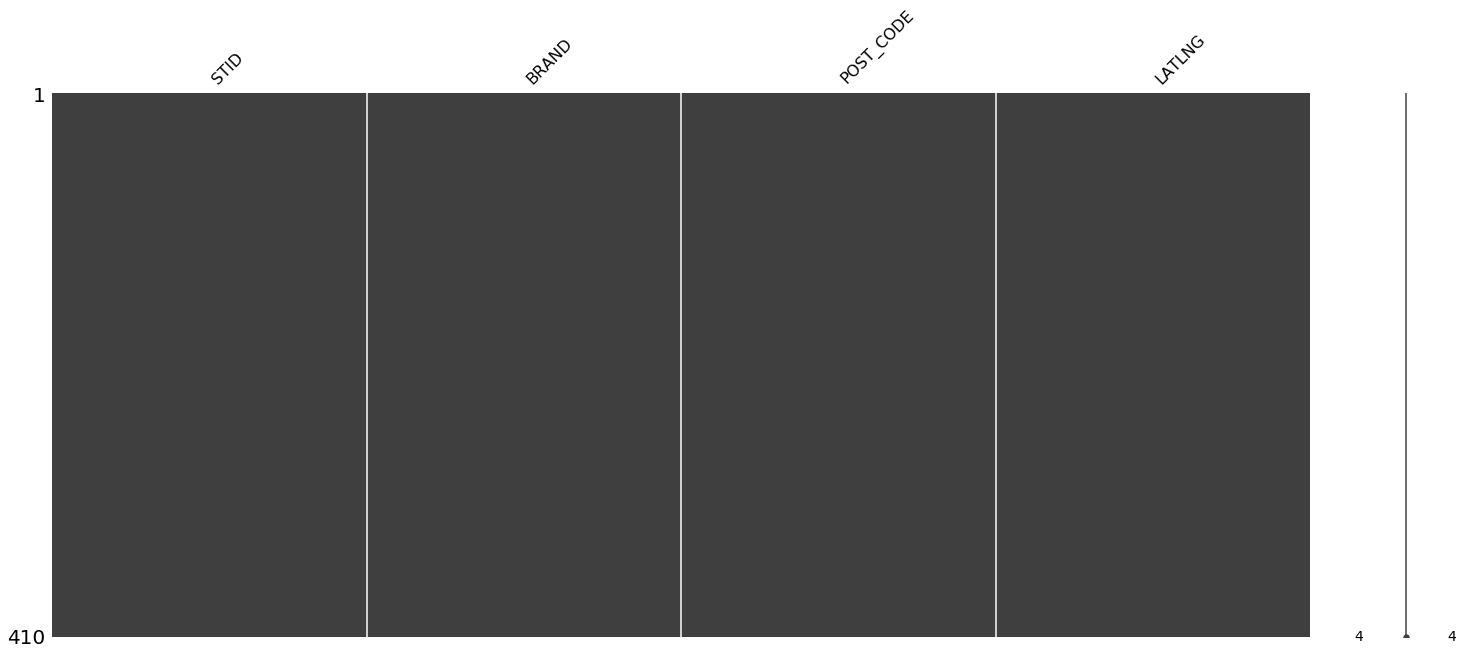

In [20]:
#Data looks good for now
ms.matrix(dfStations)

#Let's clean up the prices data now 

In [21]:
#Open prices, care for ';' seperated data
origPrices = pd.read_csv('data/example_sprit_cut_prices.csv', sep=';')

In [22]:
#Get a quick understanding of what data is available
origPrices.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [23]:
#consider size of matrices
origPrices.shape

(2189526, 6)

In [24]:
#Lets consider mathematical descriptions of the data
origPrices.describe()

#negative min and high max values for gas prices need to be explored

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [25]:
#Looks like we have all the data
origPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


In [26]:
dfStations.tail()

,STID,BRAND,POST_CODE,LATLNG
819,f42f62ad-05df-42a7-ba25-ba0403762785,BFT,76344,"49.0734899, 8.39201"
820,51d4b5b6-a095-1aa0-e100-80009459e03a,JET,76855,"49.2043, 7.953710000000001"
821,a0ad7e17-ff61-47cf-80b9-c17183527ee5,FREIE TANKSTELLE,76467,"48.8899299, 8.2668999"
822,9b81b226-01ca-4065-b68e-ad616adcd293,AVIA,76661,"49.2327, 8.4168299"
823,00060982-0001-4444-8888-acdcffffffff,TANKSTELLE HEINZ,76189,"49.008991200000004, 8.3274402"


In [27]:
# Let's merge the two tables now before working the prices data

#Both our tables are ready, let's merge into a new table and dig deeper
dataMerged = pd.merge(dfStations, origPrices,how='inner',on='STID')
#dataMerged = dataMerged.reset_index(drop=True)
dataMerged.tail()
#dataMerged.info()

,STID,BRAND,POST_CODE,LATLNG,E5,E10,DIESEL,DATE_CHANGED,CHANGED
2175469,00060982-0001-4444-8888-acdcffffffff,TANKSTELLE HEINZ,76189,"49.008991200000004, 8.3274402",1279,1259,1109,2015-01-23 12:14:01.000000,21
2175470,00060982-0001-4444-8888-acdcffffffff,TANKSTELLE HEINZ,76189,"49.008991200000004, 8.3274402",1259,1239,1059,2015-01-24 12:50:01.000000,1
2175471,00060982-0001-4444-8888-acdcffffffff,TANKSTELLE HEINZ,76189,"49.008991200000004, 8.3274402",1239,1219,1059,2015-01-24 13:54:01.000000,20
2175472,00060982-0001-4444-8888-acdcffffffff,TANKSTELLE HEINZ,76189,"49.008991200000004, 8.3274402",1249,1229,1059,2015-01-24 16:34:01.000000,20
2175473,00060982-0001-4444-8888-acdcffffffff,TANKSTELLE HEINZ,76189,"49.008991200000004, 8.3274402",1309,1289,1159,2015-01-26 06:22:01.000000,21


In [28]:
df = dataMerged.copy()

# Lets start exploring the data

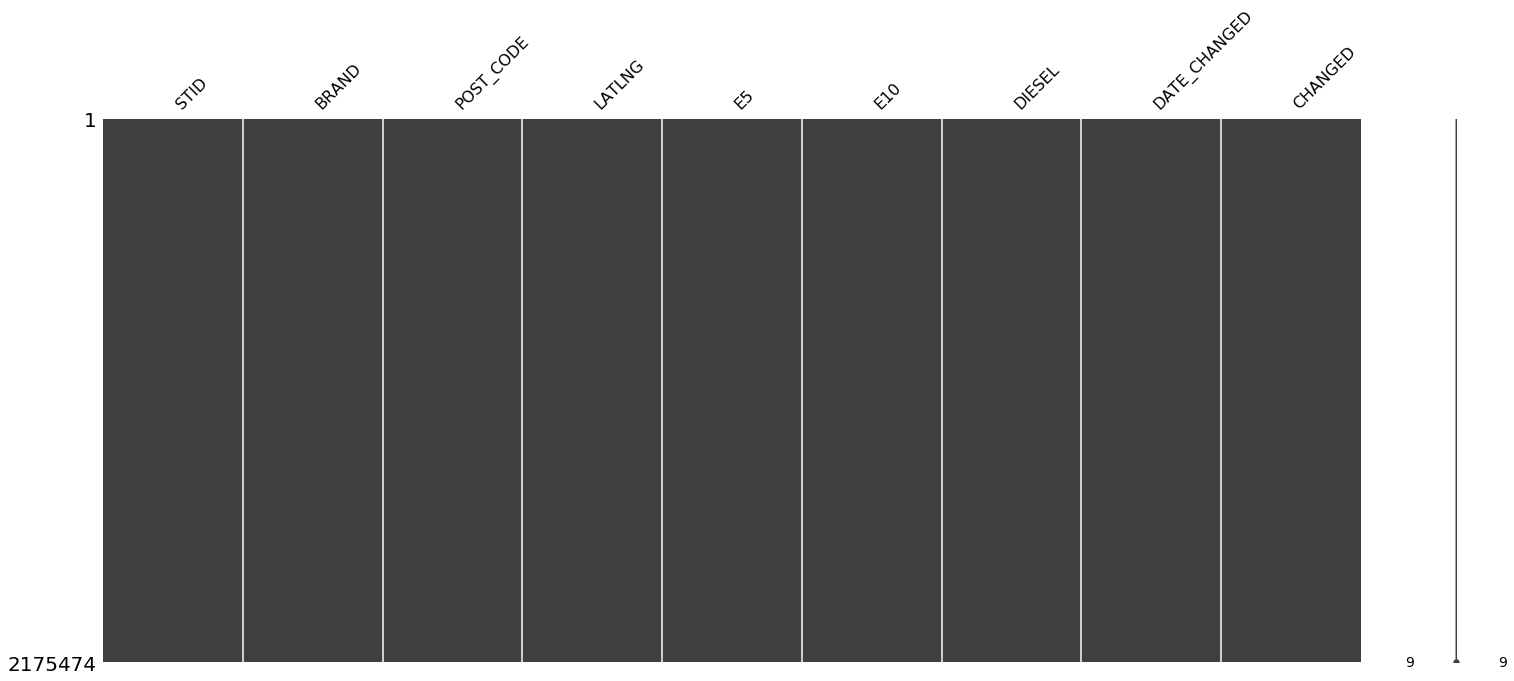

In [29]:
#No data missing here, that's good
ms.matrix(df)

In [30]:
%%capture
#Let's do something similar for the prices table

#Changed isnt useful
df.drop(['CHANGED'],axis=1,inplace=True,errors='ignore')
#Convert date changed into a date format
df['DATE'] = pd.to_datetime(df.DATE_CHANGED,format='%Y-%m-%d')
#format='%Y-%m-%d')
df.drop(['DATE_CHANGED'],axis=1,inplace=True,errors='ignore')
#dataPrices.info()

#2014-10-02 

In [31]:
df['DATE'] = pd.to_datetime(df['DATE']).dt.date

In [32]:
##We can see the range of prices are ok. The prices are in cents per litre.
df.describe()

,POST_CODE,E5,E10,DIESEL
count,2.175474e+06,2.175474e+06,2.175474e+06,2.175474e+06
mean,7.020894e+04,1.434104e+03,1.403870e+03,1.247327e+03
std,6.100862e+03,2.096316e+02,2.121899e+02,1.037829e+02
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.724500e+04,1.379000e+03,1.349000e+03,1.169000e+03
50%,6.768500e+04,1.459000e+03,1.429000e+03,1.234000e+03
75%,7.622700e+04,1.529000e+03,1.499000e+03,1.319000e+03
max,7.797200e+04,9.999000e+03,9.999000e+03,1.129000e+04


In [33]:
#This will combine data by day and get the mean value for the gas prices
#It destroys Brand, Post_code, LatLng, and STID... not sure how to handle this

df = df.groupby('DATE', as_index=False, sort=True) \
        .agg({'STID':lambda z: ','.join(z.astype(str)),
              'E5':'mean',
              'E10':'mean',
              'DIESEL':'mean',
              'BRAND':lambda w: ','.join(w.astype(str)),
              'POST_CODE':lambda y: ','.join(y.astype(str)), 
              'LATLNG':lambda z: ','.join(z.astype(str))})\
        .reindex(['DATE','STID','BRAND','POST_CODE','LATLNG','E5','E10','DIESEL'], axis=1)
print (df)

           DATE                                               STID  \
0    2014-06-08  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
1    2014-06-09  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
2    2014-06-10  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
3    2014-06-11  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
4    2014-06-12  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
5    2014-06-13  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
6    2014-06-14  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
7    2014-06-15  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
8    2014-06-16  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
9    2014-06-17  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
10   2014-06-18  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
11   2014-06-19  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
12   2014-06-20  d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...   
13   2014-06-21  d37

In [34]:
##Strip time from date col
##make the date col the index
df = df.set_index(pd.DatetimeIndex(df['DATE']))
df = df.drop(['DATE'], axis=1)
df = df.sort_values(by='DATE', axis='index')
df.head()

,STID,BRAND,POST_CODE,LATLNG,E5,E10,DIESEL
DATE,,,,,,,
2014-06-08,"d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...","ARAL,ARAL,JET,JET,JET,JET,ARAL,ARAL,JET,JET,JE...","76139,76139,68169,68169,68169,68169,67663,6766...","49.0202799, 8.459429,49.0202799, 8.459429,49.5...",1571.418112,1519.568401,1370.551060
2014-06-09,"d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...","ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,A...","76139,76139,76139,76139,76139,76139,76139,7613...","49.0202799, 8.459429,49.0202799, 8.459429,49.0...",1594.955124,1539.958156,1392.547605
2014-06-10,"d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...","ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,A...","76139,76139,76139,76139,76139,76139,76139,7613...","49.0202799, 8.459429,49.0202799, 8.459429,49.0...",1573.784822,1505.970221,1377.243036
2014-06-11,"d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...","ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,A...","76139,76139,76139,76139,76139,76139,76139,7613...","49.0202799, 8.459429,49.0202799, 8.459429,49.0...",1581.423401,1515.335151,1378.091720
2014-06-12,"d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...","ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,A...","76139,76139,76139,76139,76139,76139,76139,7613...","49.0202799, 8.459429,49.0202799, 8.459429,49.0...",1585.644198,1522.692826,1382.110255


# Lets consider some visual plots

Text(0.5,1,'data.corr()')

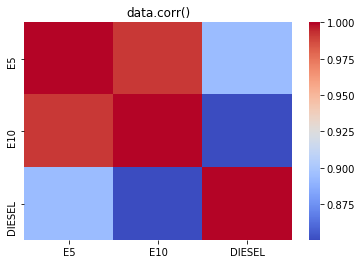

In [35]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('data.corr()')

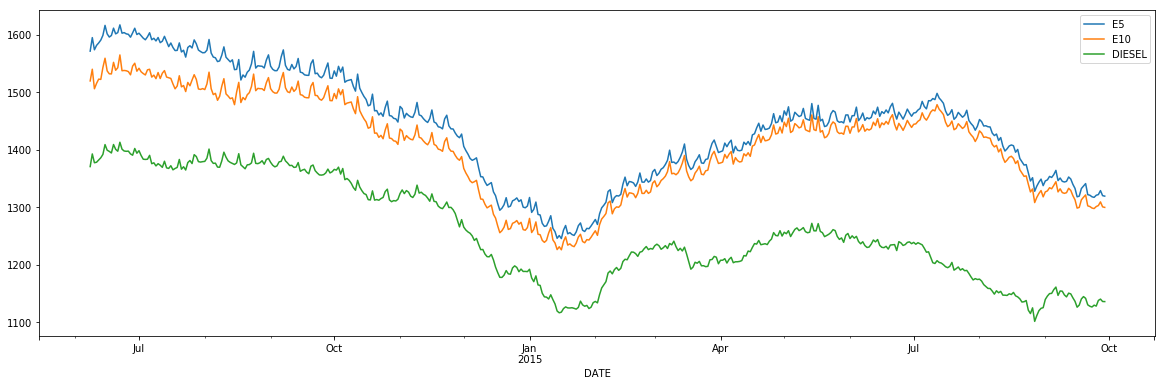

In [36]:
##Once plotted, we can see the trends of each gas type

df['E5'].plot(legend=True)
df['E10'].plot(legend=True)
df['DIESEL'].plot(figsize=(20,6), legend=True)

In [37]:
#avg prices of each fuel type over a year
#Here we see a mean price of 1.28 euro per liter of diesel

df[:365].describe()

,E5,E10,DIESEL
count,365.000000,365.000000,365.000000
mean,1449.126116,1413.840201,1281.331051
std,102.736560,92.218403,83.530015
min,1245.307239,1225.772306,1116.128752
25%,1374.226672,1346.634846,1214.234323
50%,1453.989204,1426.819195,1261.208599
75%,1540.572387,1498.469379,1369.418522
max,1617.142450,1564.813390,1412.897436


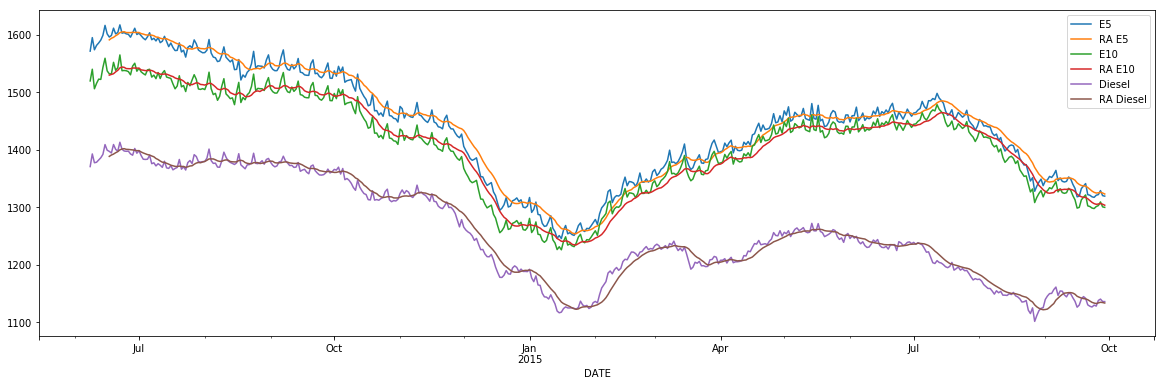

In [38]:
##Using 10 day rolling averages we can smooth out some of the sudden peaks and valleys

raE5 = df['E5'].rolling(10).mean() #10 day rolling average, E5
raE10 = df['E10'].rolling(10).mean() #10 day rolling average, E10
raDIESEL = df['DIESEL'].rolling(10).mean() #10 day rolling average, Diesel

DFra = pd.DataFrame({'E5': df['E5'], 'RA E5': raE5,
                     'E10': df['E10'], 'RA E10': raE10,
                     'Diesel': df['DIESEL'], 'RA Diesel': raDIESEL})
DFra.plot(figsize=(20, 6), legend=True, title='')

# And now let's set up our test data

In [39]:
#DFtest = DFra.drop(columns=['E5', 'E10', 'Diesel'])
DFtest = df.copy()
DFtest['RA E5'] = DFra['RA E5']
DFtest['RA E10'] = DFra['RA E10']
DFtest['RA Diesel'] = DFra['RA Diesel']

DFtest = DFtest.drop(df.index[:10])
DFtest.head()
#DFE5test = DFtest.drop(columns=['RA E10', 'RA Diesel', 'E10', 'Diesel'])

,STID,BRAND,POST_CODE,LATLNG,E5,E10,DIESEL,RA E5,RA E10,RA Diesel
DATE,,,,,,,,,,
2014-06-18,"d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...","ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,A...","76139,76139,76139,76139,76139,76139,76139,7613...","49.0202799, 8.459429,49.0202799, 8.459429,49.0...",1598.673967,1531.784968,1394.231956,1593.777063,1530.922568,1390.680566
2014-06-19,"d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...","ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,A...","76139,76139,76139,76139,76139,76139,76139,7613...","49.0202799, 8.459429,49.0202799, 8.459429,49.0...",1611.419419,1551.953765,1408.949141,1595.423493,1532.122129,1392.320720
2014-06-20,"d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...","ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,A...","76139,76139,76139,76139,76139,76139,76139,7613...","49.0202799, 8.459429,49.0202799, 8.459429,49.0...",1601.488066,1538.175840,1400.587433,1598.193817,1535.342691,1394.655160
2014-06-21,"d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...","ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,A...","76139,76139,76139,76139,76139,76139,76139,7613...","49.0202799, 8.459429,49.0202799, 8.459429,49.0...",1603.664095,1542.512166,1397.277745,1600.417886,1538.060392,1396.573762
2014-06-22,"d37bee76-91b6-485a-b974-24f1b0d391fa,d37bee76-...","ARAL,ARAL,ARAL,ARAL,ARAL,ARAL,JET,JET,JET,JET,...","76139,76139,76139,76139,76139,76139,68169,6816...","49.0202799, 8.459429,49.0202799, 8.459429,49.0...",1617.142450,1564.813390,1412.897436,1603.567712,1542.272449,1399.652480


In [40]:
#Let's add some more data from our prices, like corrlating our rolling average and the regular price 
#and day to day price differences

DFtest['Corr E5'] = DFtest['E5'].rolling(window=10).corr(DFtest['RA E5'])
DFtest['Day to Day E5'] = DFtest['RA E5'] - DFtest['RA E5'].shift(1)
DFtest['Corr E10'] = DFtest['E10'].rolling(window=10).corr(DFtest['RA E10'])
DFtest['Day to Day E10'] = DFtest['RA E10'] - DFtest['RA E10'].shift(1)
DFtest['Corr Diesel'] = DFtest['DIESEL'].rolling(window=10).corr(DFtest['RA Diesel'])
DFtest['Day to Day Diesel'] = DFtest['RA Diesel'] - DFtest['RA Diesel'].shift(1)
DFtest =DFtest.dropna()

In [41]:
#Can't use these in our test data, so drop

DFtest = DFtest.drop(['STID','BRAND','POST_CODE','LATLNG'], axis=1)
DFtest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460 entries, 2014-06-27 to 2015-09-29
Freq: D
Data columns (total 12 columns):
E5                   460 non-null float64
E10                  460 non-null float64
DIESEL               460 non-null float64
RA E5                460 non-null float64
RA E10               460 non-null float64
RA Diesel            460 non-null float64
Corr E5              460 non-null float64
Day to Day E5        460 non-null float64
Corr E10             460 non-null float64
Day to Day E10       460 non-null float64
Corr Diesel          460 non-null float64
Day to Day Diesel    460 non-null float64
dtypes: float64(12)
memory usage: 46.7 KB


In [55]:
DFtest.tail()

,E5,E10,DIESEL,RA E5,RA E10,RA Diesel,Corr E5,Day to Day E5,Corr E10,Day to Day E10,Corr Diesel,Day to Day Diesel
DATE,,,,,,,,,,,,
2015-09-25,1320.681745,1301.021002,1127.846850,1324.528915,1304.924644,1132.242869,0.359516,-1.188874,0.354115,-1.178907,0.346247,-0.825037
2015-09-26,1321.818808,1302.741647,1137.638305,1324.915158,1305.369750,1133.418998,0.582202,0.386243,0.573963,0.445106,0.489798,1.176130
2015-09-27,1328.773102,1309.074257,1139.990512,1325.877243,1306.319717,1134.453710,0.722300,0.962085,0.721249,0.949967,0.589013,1.034712
2015-09-28,1319.971835,1300.483751,1135.792015,1324.638795,1305.095480,1134.012804,0.712825,-1.238448,0.711978,-1.224237,0.501134,-0.440906
2015-09-29,1319.134945,1299.571333,1135.651897,1322.882179,1303.334396,1133.144121,0.619096,-1.756616,0.617334,-1.761084,0.223941,-0.868683


Text(0.5,1,'data.corr()')

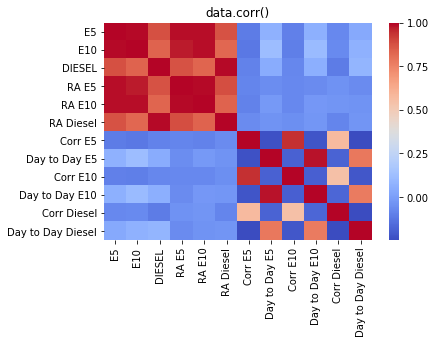

In [42]:
sns.heatmap(DFtest.corr(),cmap='coolwarm')
plt.title('data.corr()')

In [43]:
#Set up our x and y for our tests
X = DFtest
y = np.where (DFtest['RA Diesel'].shift(-1) > DFtest['RA Diesel'],1,-1)

In [44]:
#Use the first 70% to train our data, and test on the last 30%

split = int(0.7*len(df))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [46]:
#We'll use logRegression

model = LogisticRegression()

model = model.fit (X_train,y_train)

In [47]:
probability = model.predict_proba(X_test)

print (probability)

[[7.60252726e-01 2.39747274e-01]
 [8.94897912e-01 1.05102088e-01]
 [3.63495184e-01 6.36504816e-01]
 [3.33712984e-01 6.66287016e-01]
 [7.33133356e-01 2.66866644e-01]
 [5.69005881e-01 4.30994119e-01]
 [7.96074296e-01 2.03925704e-01]
 [5.91581022e-01 4.08418978e-01]
 [7.34417853e-01 2.65582147e-01]
 [7.42929734e-01 2.57070266e-01]
 [6.68439352e-01 3.31560648e-01]
 [6.74606791e-01 3.25393209e-01]
 [9.21479929e-01 7.85200707e-02]
 [9.29353736e-01 7.06462640e-02]
 [6.69946513e-01 3.30053487e-01]
 [4.76076808e-01 5.23923192e-01]
 [5.01586132e-01 4.98413868e-01]
 [4.10079633e-01 5.89920367e-01]
 [6.28691327e-01 3.71308673e-01]
 [6.18096033e-01 3.81903967e-01]
 [7.11374052e-01 2.88625948e-01]
 [4.75945704e-01 5.24054296e-01]
 [5.78194983e-01 4.21805017e-01]
 [3.32344540e-01 6.67655460e-01]
 [4.70058112e-01 5.29941888e-01]
 [6.37431855e-01 3.62568145e-01]
 [8.52815915e-01 1.47184085e-01]
 [3.55064762e-01 6.44935238e-01]
 [2.02931984e-01 7.97068016e-01]
 [2.65269610e-01 7.34730390e-01]
 [2.081676

In [48]:
#Here's our prediction. Unfortunately it just predicts if the price will move up or down
#I had trouble figuring out how to predict actual prices

predicted = model.predict(X_test)
predicted

array([-1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1])

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
#Here's our accuracy. We missed 17 data points, not bad!
print(confusion_matrix(y_test, predicted))

[[86 13]
 [ 4 22]]


In [51]:
from sklearn.metrics import classification_report

In [52]:
#And all the prediction data. We can see that we can predict the price going down 96% of the time and going up 63%
#overall an 89% accuracy, not bad!

print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

         -1       0.96      0.87      0.91        99
          1       0.63      0.85      0.72        26

avg / total       0.89      0.86      0.87       125

